In [1]:
from CFRalgorithm import TempleCFR

if __name__ == "__main__":
	k = TempleCFR(10_000, {})
	utilities = k.cfr_iterations_external()

100%|██████████| 10000/10000 [07:10<00:00, 23.20it/s] 

Average game value 0: 2.251278283603385
Average game value 1: -0.25540863824136545
Average game value 2: -0.2355354799080256


In [2]:
len(k.nodes) 

50898

In [3]:
for node in k.nodes:
    if k.nodes[node].get_average_strategy()[0]!=.5:
        print(node)
        print("regret_sum",k.nodes[node].regret_sum)
        print("strategy",k.nodes[node].get_strategy())
        print("strategy sum",k.nodes[node].strategy_sum)    
        print("average strategy",k.nodes[node].get_average_strategy())

P:0,C:GoldGold->(P:2,A:[0, 1])->(P:0
regret_sum [0.06314534 0.05407626]
strategy [0.53868348 0.46131652]
strategy sum [1727730.83716672 1536984.16283328]
average strategy [0.52921337 0.47078663]
P:0,C:GoldGold->(P:2,A:[0, 1])->(P:0,A:[1, 0])->(P:1,A:[0, 1])->(P:2,A:0,C:gold)->(P:0
regret_sum [0.53184219 0.61323243]
strategy [0.46446073 0.53553927]
strategy sum [347602.49627499 417581.50372501]
average strategy [0.45427309 0.54572691]
P:0,C:GoldGold->(P:2,A:[0, 1])->(P:0,A:[1, 0])->(P:1,A:[0, 1])->(P:2,A:0,C:gold)->(P:0,A:1,C:gold)->(P:1,A:0,C:gold)->(P:0
regret_sum [0.73536749 0.29253162]
strategy [0.71540824 0.28459176]
strategy sum [134727.19132528  64144.80867472]
average strategy [0.67745681 0.32254319]
P:0,C:GoldGold->(P:2,A:[0, 1])->(P:0,A:[1, 0])->(P:1,A:[0, 1])->(P:2,A:0,C:gold)->(P:0,A:2,C:fire)->(P:2,A:1,C:gold)->(P:1,A:0,C:gold)->(P:0
regret_sum [0.02734375 0.        ]
strategy [1. 0.]
strategy sum [3.08795e+04 5.00000e-01]
average strategy [9.99983808e-01 1.61917098e-05]
P:

In [4]:
import json

with open('cfr_strategies.json', 'w') as f:
    dump = {node: tuple(k.nodes[node].get_average_strategy()) for node in k.nodes}
    json.dump(dump, f)
    

In [5]:
import json

## open JSON file
with open('cfr_strategies.json') as f:
    data = json.load(f)

data = {node.replace("[1, 0]", "Fire"): data[node] for node in data.keys()}
data = {node.replace("[0, 1]", "NoFire"): data[node] for node in data.keys()}

## open JSON file
with open('cfr_strategies_decoded.json', 'w') as f:
    json.dump(data, f)

In [6]:
with open('cfr_strategies_decoded.json') as f:
    data = json.load(f)
data

{'P:0,C:GoldGold->(P:2': [0.5, 0.5],
 'P:0,C:GoldGold->(P:2,A:NoFire)->(P:0': [0.5292133730407453,
  0.4707866269592548],
 'P:0,C:GoldGold->(P:2,A:NoFire)->(P:0,A:Fire)->(P:1': [0.5, 0.5],
 'P:0,C:GoldGold->(P:2,A:NoFire)->(P:0,A:Fire)->(P:1,A:NoFire)->(P:2': [0.5,
  0.5],
 'P:0,C:GoldGold->(P:2,A:NoFire)->(P:0,A:Fire)->(P:1,A:NoFire)->(P:2,A:0,C:gold)->(P:0': [0.4542730850030679,
  0.545726914996932],
 'P:0,C:GoldGold->(P:2,A:NoFire)->(P:0,A:Fire)->(P:1,A:NoFire)->(P:2,A:0,C:gold)->(P:0,A:1,C:gold)->(P:1': [0.5,
  0.5],
 'P:0,C:GoldGold->(P:2,A:NoFire)->(P:0,A:Fire)->(P:1,A:NoFire)->(P:2,A:0,C:gold)->(P:0,A:1,C:gold)->(P:1,A:0,C:gold)->(P:0': [0.6774568130519939,
  0.32254318694800616],
 'P:0,C:GoldGold->(P:2,A:NoFire)->(P:0,A:Fire)->(P:1,A:NoFire)->(P:2,A:0,C:gold)->(P:0,A:1,C:gold)->(P:1,A:0,C:gold)->(P:0,A:1,C:fire)->(P:1': [0.5,
  0.5],
 'P:0,C:GoldGold->(P:2,A:NoFire)->(P:0,A:Fire)->(P:1,A:NoFire)->(P:2,A:0,C:gold)->(P:0,A:1,C:gold)->(P:1,A:0,C:gold)->(P:0,A:1,C:fire)->(P:1,A:2,C

<Axes: >

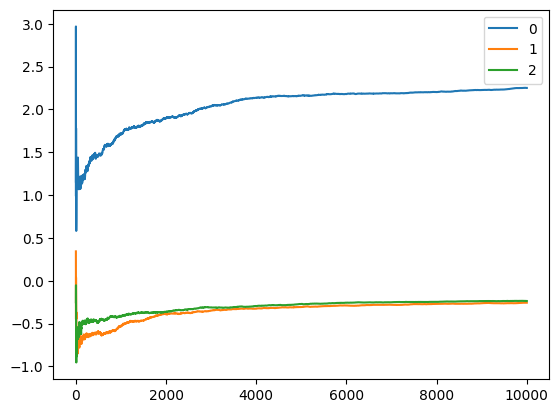

In [7]:
import pandas as pd
pd.DataFrame(utilities).plot()